In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
admission = pd.read_csv('C:/Users/Sinegalatha/Downloads/sanjaykiren/archive/Admission_Predict.csv')


In [5]:
admission.head() # to see the top five records of the data sets

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
admission.shape # to  see what is the shape of data_set our data set has 400 records and 9 fields

(400, 9)

In [7]:
admission.columns #to see the name of the fields 

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
admission.describe() # to see the mathematical values of the data sets i.e mean,standar_deviation ,minimum_value,maximum_value,counts etc.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
admission.info() #to see the type of values in every fields i.e int ,float etc 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [10]:
admission.isnull().sum() # to see that if dataset has any null_values or not

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
# the dataset has no null_values so there is no need to fill null_values

In [12]:
# now preparing the input data_set and out_labels

In [13]:
X=admission.drop(['Serial No.','Chance of Admit '],axis=1) #input data_set
X.shape

(400, 7)

In [14]:
y=admission['Chance of Admit '] #output labels
y.shape

(400,)

In [15]:
admission.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
244,245,314,107,2,2.5,4.0,8.56,0,0.63
158,159,306,106,2,2.0,2.5,8.14,0,0.61
290,291,307,105,2,2.5,3.0,7.65,0,0.58
206,207,315,99,2,3.5,3.0,7.89,0,0.63
142,143,331,115,5,4.0,3.5,9.44,1,0.92


***#now observing the inter_relation between various fiels in dataset using graps***

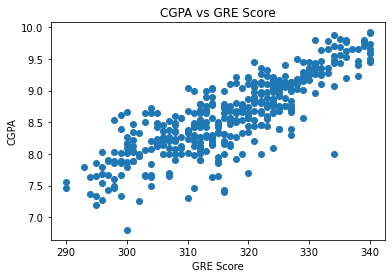

In [16]:
plt.scatter(admission['GRE Score'],admission['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

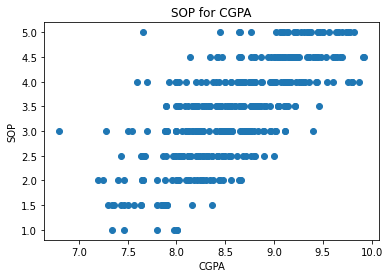

In [17]:
plt.scatter(admission['CGPA'],admission['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

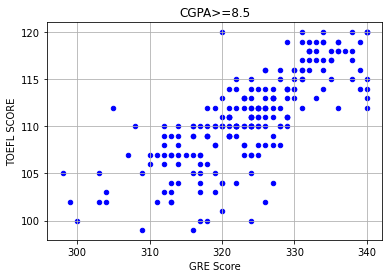

In [18]:
admission[admission.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="BLUE")

plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)

plt.show()

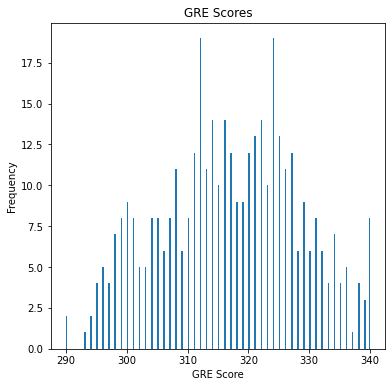

In [19]:
admission["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

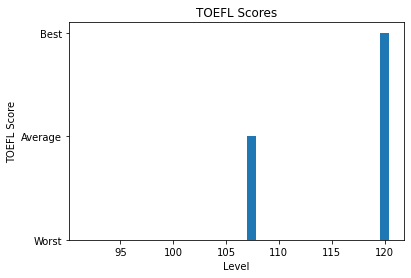

In [20]:

p = np.array([admission["TOEFL Score"].min(),admission["TOEFL Score"].mean(),admission["TOEFL Score"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

plt.show()

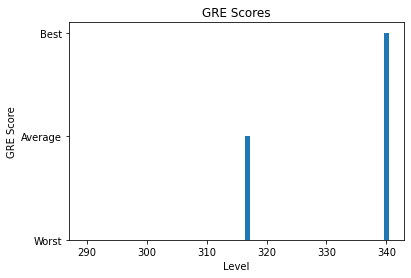

In [21]:

g = np.array([admission["GRE Score"].min(),admission["GRE Score"].mean(),admission["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

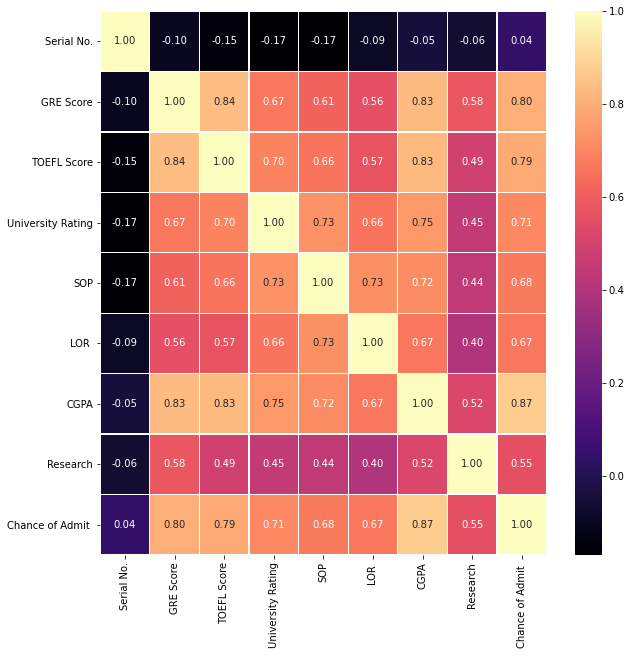

In [22]:
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.heatmap(admission.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

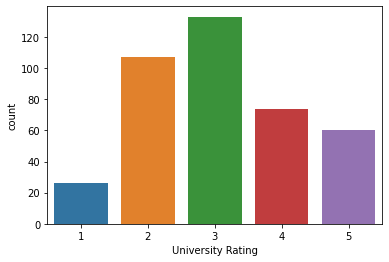

In [23]:
admission.Research.value_counts()

sns.countplot(x="University Rating",data=admission)

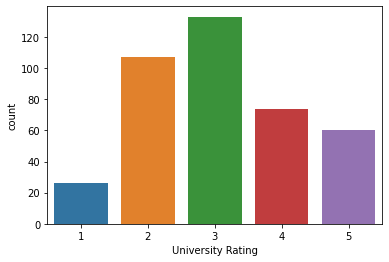

In [24]:
admission.Research.value_counts()

sns.countplot(x="University Rating",data=admission)

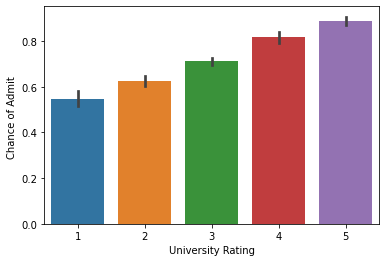

In [25]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=admission)

In [26]:
#splittin the input data(x) and output labels(y) into train data and test data 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20) # test_size defins the volume of train data and test data here 0.2 means 20% of the data belongs to the test data

In [27]:
X_train.shape

(320, 7)

In [28]:
X_test.shape

(80, 7)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
35,0.60,0.629630,1.00,1.000,1.00,0.800000,1.0
104,0.72,0.703704,0.50,0.625,0.50,0.750000,1.0
398,0.44,0.370370,0.50,0.625,0.75,0.660000,0.0
48,0.62,0.629630,0.50,0.625,1.00,0.683333,1.0
241,0.54,0.370370,0.25,0.375,0.25,0.450000,0.0


In [39]:
import pickle
pickle. dump(scaler, open('scaler_admin', 'wb'))

In [30]:
from sklearn.ensemble import RandomForestRegressor
rgr=RandomForestRegressor()
rgr.fit(X_train,y_train)

RandomForestRegressor()

In [32]:
import pickle
pickle. dump(rgr, open('randomreg_chronic', 'wb'))

In [33]:
rgr.score(X_test,y_test)

0.8138611560335055

In [34]:
pip install xgboost

In [35]:
import xgboost as xgb
xg = xgb.XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [36]:
xg.score(X_test,y_test)

0.7989865965710163

In [37]:
y_predict=rgr.predict(X_test)
y_predict
#Y_test.shape

array([0.6826, 0.7321, 0.871 , 0.6169, 0.696 , 0.6838, 0.8865, 0.6274,
       0.7668, 0.7988, 0.7689, 0.7367, 0.6365, 0.4726, 0.802 , 0.7448,
       0.6644, 0.7386, 0.7761, 0.9542, 0.6687, 0.8158, 0.7959, 0.76  ,
       0.548 , 0.9335, 0.7063, 0.771 , 0.9448, 0.5624, 0.4842, 0.8089,
       0.4479, 0.5615, 0.6985, 0.5214, 0.7355, 0.9241, 0.4509, 0.7353,
       0.9565, 0.5318, 0.5   , 0.7841, 0.6846, 0.6178, 0.8346, 0.7386,
       0.9271, 0.7637, 0.9361, 0.933 , 0.537 , 0.4588, 0.7487, 0.7863,
       0.9441, 0.7263, 0.9522, 0.6307, 0.6634, 0.6789, 0.5701, 0.8111,
       0.916 , 0.7187, 0.9568, 0.6262, 0.612 , 0.944 , 0.6263, 0.9449,
       0.786 , 0.5236, 0.5782, 0.751 , 0.7451, 0.7308, 0.6931, 0.8818])

In [38]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.04649625000000004
Mean Squared Error: 0.003947536624999995
Root Mean Squared Error: 0.06282942483422871
